In [49]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imageio
from PIL import Image, ImageDraw
import os
import matplotlib.pyplot as plt

In [50]:
#READ IMAGES FROM FOLDER
images = []
def read_all_images():
    
    folder=r'C:\Users\yigit\Desktop\stajdatades\uygun'
    for filename in os.listdir(folder):
        img=Image.open(os.path.join(folder,filename)).convert("RGB")
        #img = cv2.imread(os.path.join(folder,filename),cv2.IMREAD_GRAYSCALE)
        img=np.array(img)
 
        if img is not None:
            images.append(img)
            
    return images
read_all_images()


[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 

In [51]:
#CALCULATE AVERAGE COLOR WITH CROPPING IMAGE WITHOUT INCLUDING BLACK PARTS
#CHNAGE BLACK MASK (which is 0) WITH AVERAGE COLOR

def remove_black_perimeter(image):
    
    y=165
    x=195
    h=600
    w=695
    crop_img = image[y:y+h, x:x+w]

    avg_color_per_row = np.average(crop_img, axis=0)
    avg_color = np.average(avg_color_per_row, axis=0)

    image_copy = image.copy()
    black_pixels_mask = np.all(image == [0, 0, 0], axis=-1)

    image_copy[black_pixels_mask] = avg_color
    #image_copy[non_black_pixels_mask] = [0, 0, 0]
    
    img = Image.fromarray(image_copy, 'RGB')
    ROUND_IMAGES(img)


In [52]:
#CROP THE IMAGE ROUNDED SHAPE AND GET RID OF SOME PROBLEMS


def ROUND_IMAGES(img):
    
    npImage=np.array(img)
    h,w=img.size
    
    # Create same size alpha layer with circle
    alpha = Image.new('L', img.size,0)
    draw = ImageDraw.Draw(alpha)
    draw.pieslice([0,0,h,w],0,360,fill=255)

    # Convert alpha Image to numpy array
    npAlpha=np.array(alpha)

    # Add alpha layer to RGB
    npImage=np.dstack((npImage,npAlpha))
    # Save with alpha
    #plt.imshow(npImage)
    print(img_estim(npImage))


In [53]:
#ACCORDING TO IMG MEANS DETERMINE TAG
mean_tresh=[]
def img_estim(img):
  
    mean_tresh.append(np.mean(img))
    
    if (np.mean(img)<=70):
        return 'COK KARANLIK'
    elif (np.mean(img)<=105):
        return 'KARANLIK'
    elif (np.mean(img)<=155):
        return 'UYGUN'
    else:
        return 'COK PARLAK'
    
for i in range(len(images)):
    remove_black_perimeter(images[i])
    

    
   
 

UYGUN
UYGUN
UYGUN
UYGUN
UYGUN
UYGUN
UYGUN
KARANLIK
KARANLIK
UYGUN
UYGUN
UYGUN
UYGUN
UYGUN
UYGUN
UYGUN
KARANLIK
UYGUN
UYGUN
UYGUN
UYGUN
UYGUN
UYGUN
UYGUN
UYGUN
UYGUN
UYGUN
UYGUN
KARANLIK
KARANLIK
UYGUN
UYGUN
UYGUN
UYGUN
UYGUN
UYGUN
UYGUN
UYGUN
UYGUN
UYGUN
UYGUN
UYGUN
UYGUN
UYGUN
UYGUN
UYGUN
UYGUN
UYGUN
UYGUN
UYGUN
KARANLIK
KARANLIK
KARANLIK
UYGUN
UYGUN
KARANLIK
UYGUN
UYGUN
UYGUN
UYGUN
UYGUN
UYGUN
UYGUN
UYGUN
UYGUN
UYGUN
UYGUN
UYGUN
UYGUN
UYGUN
UYGUN
UYGUN
UYGUN
UYGUN
UYGUN
UYGUN
UYGUN
UYGUN
UYGUN
UYGUN
UYGUN


ORT 122.32712625574183
MAX 150.78751802444458
MİN 89.0414206981659


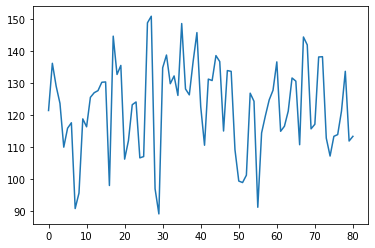

In [54]:
#TO DEMONSTRATION PURPOSES ADD THIS PART
total=0
for i in range(len(mean_tresh)):
    total=total+mean_tresh[i]
    
print('ORT',total/len(images))
print('MAX',np.amax(mean_tresh))
print('MİN', np.amin(mean_tresh))

plt.plot(mean_tresh)
plt.show()
#plt.imsave(r'C:\Users\yigit\Desktop\a.png',tut[0])
